In [10]:
import keras
import numpy as np
import matplotlib.pyplot as plt
from skimage import transform

C:\Users\Egor\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


### Данные:
Будем работать с датасетом [FashionMNIST](https://github.com/zalandoresearch/fashion-mnist). 

In [11]:
from keras.datasets import fashion_mnist

(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 1s 0us/step


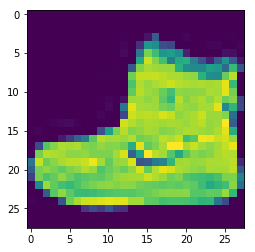

In [4]:
plt.imshow(X_train[0].reshape([28,28]))

### Задание:
Будем решать задачу классификации на 10 классов. Каждый класс соответствует одному из типов одежды. Исходная размерность признакового пространства: `784`, каждый пиксель является признаком. Будем снижать размерность признакового пространства с помощью метода главных компонент (`PCA`). Ваша задача оценить качество решенения задачи классификации по метрике `accuracy` в зависимости от числа главных компонент. Также оцените дисперсию функции качества в зависимости от числа главных компонент.

Нарисуйте график зависимости функции качества и ее дисперсии от числа главных компонент.

In [12]:
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [13]:
pca = PCA(n_components=3)
used_indices = np.random.choice(np.arange(X_train.shape[0]), 10000, replace=False)
X_train_lowdim = pca.fit_transform(X_train[used_indices].reshape([-1, 784]))
lr = LogisticRegression()
lr.fit(X_train_lowdim, y_train[used_indices])
accuracy_score(y_test, lr.predict(pca.transform(X_test.reshape([-1, 784]))))

0.5776

Используйте следующую сетку числа главных компонент: `[3, 5, 7, 12, 18, 25, 33, 40, 48, 55]`. Для ускорения сходимости можете семплировать подвыборки из `X_train`. 

### **Цель эксперимента:**

Исследование зависимости точности решения задачи классификации от размерности признакового пространства.

### **Используемые переменные:**

* `N` - количество измерений точности
* `n_components` - сетка главных компонент признакового пространства
* `accuracy_list` - список, содержащий измерения средней точности для каждого элемента сетки
* `accuracy_var_list` - список, содержащий измерения дисперсии точности для каждого элемента сетки

In [27]:
N = 10
n_components = [3, 5, 7, 12, 18, 25, 33, 40, 48, 55]
accuracy_list = []
accuracy_var_list = []

for n_components in pca_steps:
    temp = []
    for i in range(N):
        pca = PCA(n_components=n_components)
        used_indices = np.random.choice(np.arange(X_train.shape[0]), 10000, replace=False)
        X_train_lowdim = pca.fit_transform(X_train[used_indices].reshape([-1, 784]))
        lr = LogisticRegression()
        lr.fit(X_train_lowdim, y_train[used_indices])
        accuracy = accuracy_score(y_test, lr.predict(pca.transform(X_test.reshape([-1, 784]))))
        temp.append(accuracy)
    accuracy_list.append(np.mean(temp))
    accuracy_var_list.append(np.var(temp))

### Настройка отображения графиков:

In [35]:
from matplotlib import pylab as plt
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = 'FreeSerif'
plt.rcParams['lines.linewidth'] = 2
plt.rcParams['lines.markersize'] = 12
plt.rcParams['xtick.labelsize'] = 24
plt.rcParams['ytick.labelsize'] = 24
plt.rcParams['legend.fontsize'] = 24
plt.rcParams['axes.titlesize'] = 36
plt.rcParams['axes.labelsize'] = 24

### Построение графиков:

C:\Users\Egor\Anaconda3\lib\site-packages\matplotlib\font_manager.py:1328: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


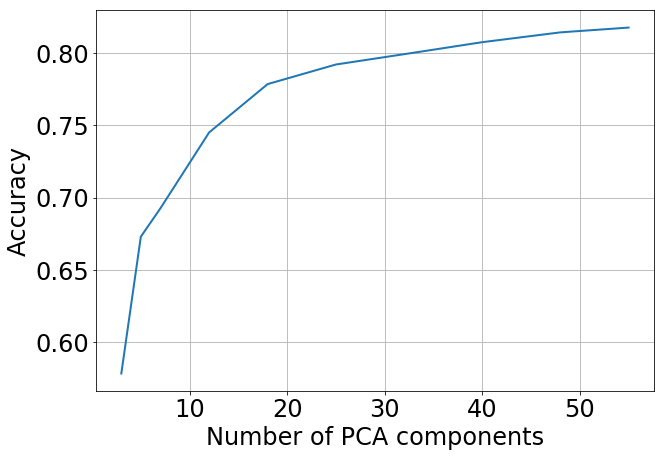

In [34]:
plt.figure(figsize=(10,7))
plt.plot(pca_steps, accuracy_list)
plt.grid()
plt.xlabel("Number of PCA components")
plt.ylabel("Accuracy")
plt.show()

C:\Users\Egor\Anaconda3\lib\site-packages\matplotlib\font_manager.py:1328: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


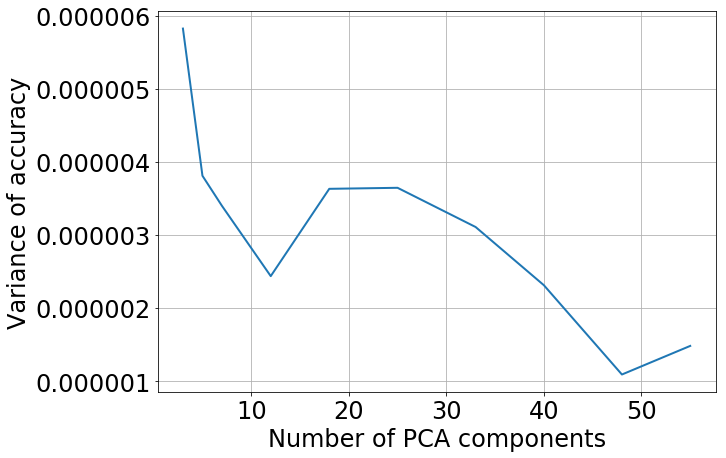

In [36]:
plt.figure(figsize=(10,7))
plt.plot(pca_steps, accuracy_var_list)
plt.grid()
plt.xlabel("Number of PCA components")
plt.ylabel("Variance of accuracy")
plt.show()

### Вывод:

Из первого графика видно, что качество решения уже при 40 компонентах достигает 81%, причем дальнейший рост точности значительно уменьшается. Второй график показывает, что точность наших измерений не менее 0.0005% при количестве компонент большем 5. Таким образом, снижение размерности признакового пространства методом главных компонент может существенно снизить сложность вычислений за счет некоторой потери информации. 